# Tema : Fundamentos de Regresión y Modelos Estacionarios
![](src/img/logo_utb.png){width=40%} 
![](src/img/logo_etd.png){width=40%}
- **Profesor:**
- **Fernando Salcedo Mejía, Eco Msc.**
- Programa de Ciencias de Datos | Escuela de transformación digital.
- 2026-1

## Ejemplo 2 : El modelo macroeconómico del crecimiento del consumo en Estados Unidos

- Queremos modelar cómo cambia el consumo real (compra de bienes y servicios) de una economía según variables macroeconómicas importantes. El consumo es uno de los componentes más importantes de una economía.

$$
\Delta C_t = \beta_0 + \beta_1 Ingreso_t + \beta_2 Industria_t + \beta_3 Ahorro_t + \beta_4 Desempleo_t + \varepsilon_t
$$

- $\Delta C_t$ es el cambio porcentual en el gasto real de consumo personal.
- $Ingreso_t$​ es el cambio porcentual en el ingreso personal real disponible.
- $Industria_t$​ es el cambio porcentual en la producción industrial.
- $Ahorro_t$​ es el cambio porcentual en el ahorro personal.
- $Desempleo_t$​ es el cambio en la tasa de desempleo.

- Usar el archivo `US_change.csv` para modelar.


## Librerias necesarias

In [1]:
# Instalar todas las librerias necesarias previamente desde r-requirements.txt
library(tidyverse)
library(fable)
library(tsibble)
library(feasts)
library(ggtime)
library(GGally)

# tamaño de los graficos
options(repr.plot.width = 12, 
        repr.plot.height = 8,
        repr.plot.res = 300,
        repr.plot.pointsize = 14)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.2.0     ✔ readr     2.1.6
✔ forcats   1.0.1     ✔ stringr   1.6.0
✔ ggplot2   4.0.2     ✔ tibble    3.3.1
✔ lubridate 1.9.5     ✔ tidyr     1.3.2
✔ purrr     1.2.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Cargando paquete requerido: fabletools


Adjuntando el paquete: ‘tsibble’


The following object is masked from ‘package:lubridate’:

    interval


The following objects are masked from ‘package:base’:

    intersect, setdiff, union


Registered S3 methods overwritten by 'ggtime':
  method           from      
  autolayer.fbl_ts fabletools
  autolayer.tbl_ts fabletools
  autoplot.dcmp_ts fabletools
  autoplot.fbl_ts  fabletools
  autoplot.tbl_ts  fabletools
  fortify.fbl

## Cargar datos y exploración

In [7]:
# 1. Cargar y preparar datos
us_change <- read_csv("datos/US_change.csv") |>
  mutate(ds = yearquarter(ds))  |> # Configurar el tiempo de la serie
  as_tsibble(index = ds)

# Encabezado
head(us_change)

Rows: 198 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): unique_id
dbl  (5): y, Income, Production, Savings, Unemployment
date (1): ds

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


ds,y,Income,Production,Savings,Unemployment,unique_id
<qtr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1970 Q1,0.6185664,1.0448013,-2.4524855,5.299014,0.9,US_change
1970 Q2,0.4519840,1.2256472,-0.5514595,7.789894,0.5,US_change
1970 Q3,0.8728718,1.5851538,-0.3586518,7.403984,0.5,US_change
1970 Q4,-0.2718479,-0.2395449,-2.1856909,1.169898,0.7,US_change
1971 Q1,1.9013450,1.9759249,1.9097644,3.535667,-0.1,US_change
1971 Q2,0.9148773,1.4459085,0.9015695,5.874764,-0.1,US_change


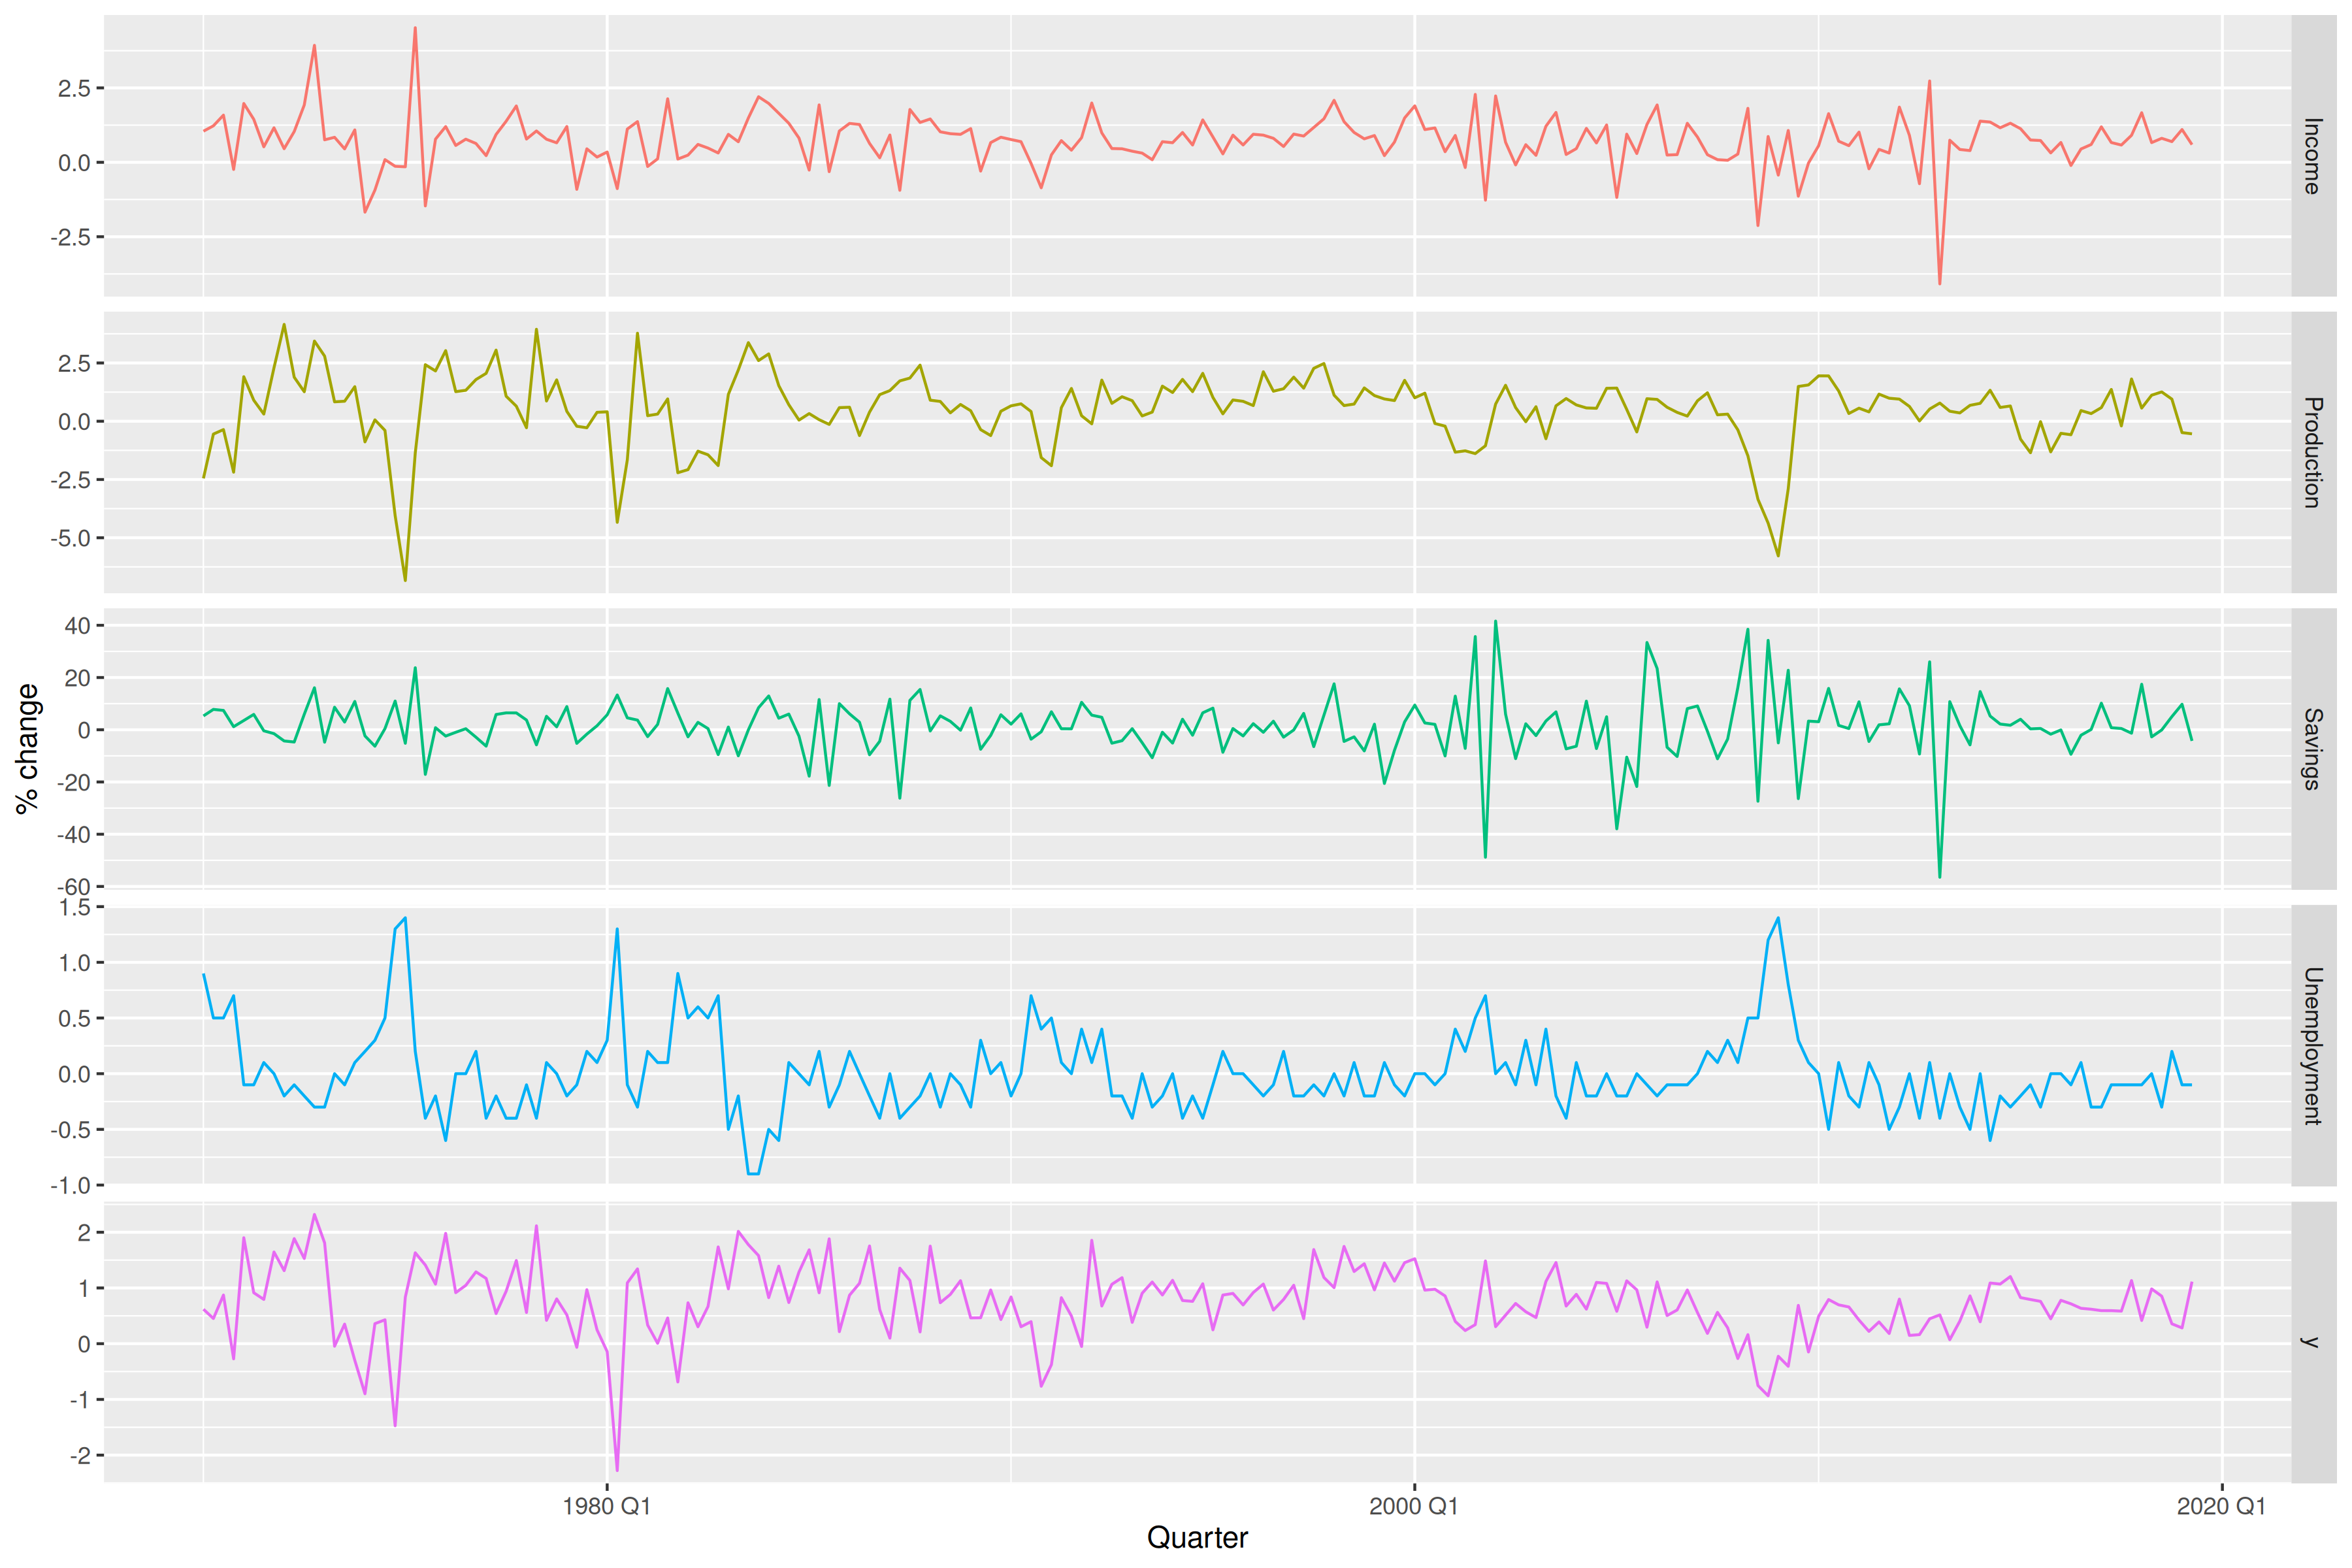

In [3]:
# Visualización
us_change |>
  select(-unique_id) |>
  pivot_longer(-ds) |>
  ggplot(aes(ds, value, colour = name)) +
  geom_line() +
  facet_grid(name ~ ., scales = "free_y") +
  guides(colour = "none") +
  labs(y="% change", x = "Quarter")

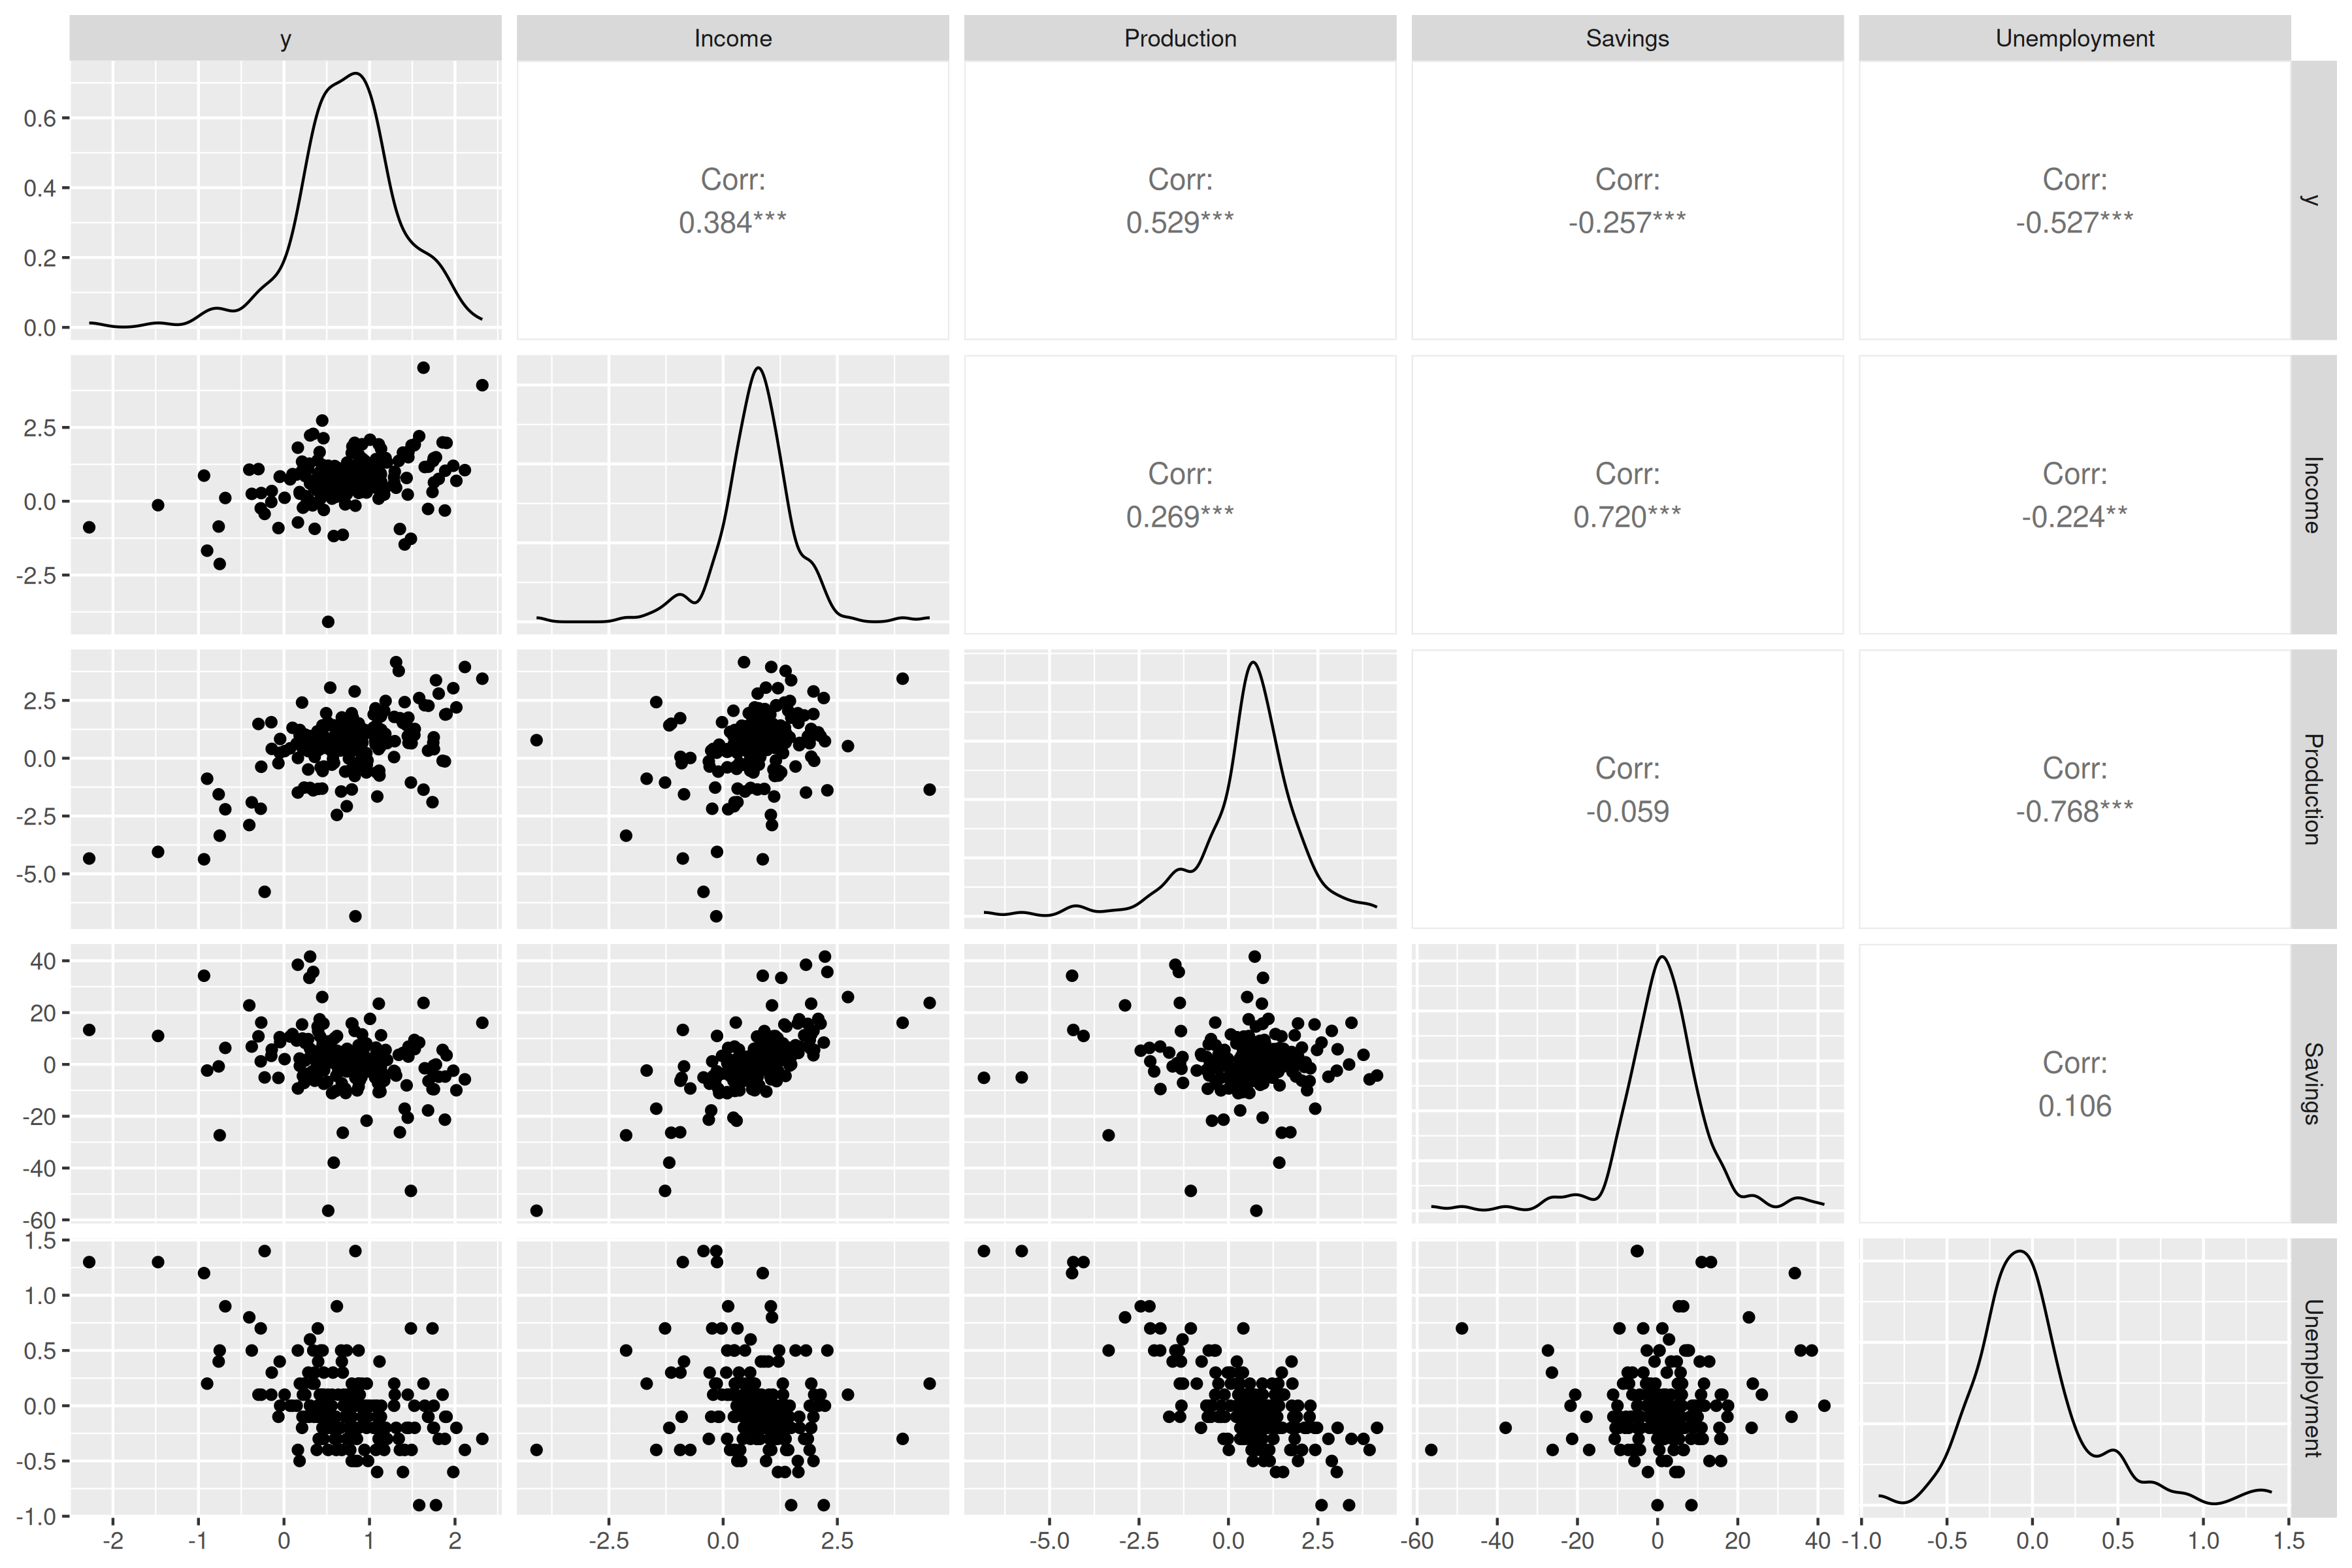

In [4]:
# Grafico de correlación exploratorio
us_change |> ggpairs(columns = 2:6)

## Modelo de regresión lineal MCO por TSLM (Time Series Linear Model) de la librería 'fable'

In [5]:
# Modelo de Regresión Lineal (MCO)
# Usamos TSLM (Time Series Linear Model) de la librería 'fable'
fit <- us_change %>%
  model(
    mco = TSLM(y ~ Income + Production + Savings + Unemployment)
  )

# 4. Resumen del modelo
report(fit)

Series: y 
Model: TSLM 

Residuals:
     Min       1Q   Median       3Q      Max 
-0.90555 -0.15821 -0.03608  0.13618  1.15471 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.253105   0.034470   7.343 5.71e-12 ***
Income        0.740583   0.040115  18.461  < 2e-16 ***
Production    0.047173   0.023142   2.038   0.0429 *  
Savings      -0.052890   0.002924 -18.088  < 2e-16 ***
Unemployment -0.174685   0.095511  -1.829   0.0689 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3102 on 193 degrees of freedom
Multiple R-squared: 0.7683,	Adjusted R-squared: 0.7635
F-statistic:   160 on 4 and 193 DF, p-value: < 2.22e-16


## Interpretación del modelo

### Bondad de ajuste : 
- El modelo explica el 76.8% de la variabilidad del cambio del consumo ($R^2$). Es un ajuste aceptable como factores que han explicado la variabilidad del consumo a lo largo de la ventana de observación.
- Al estar el $\text{Adj.} R^2$ con un valor similar al $R^2$ nos indica que las variables explicativas aportan a explicar el comportamiento del cambio del consumo. 
- En su conjunto, el modelo es significativo observando el estadístico $F-statistic$ ya que es prácticamente cero.

### Análisis de coeficientes:
| Variable | Coeficiente | Significancia (p-valor) | Interpretación |
| :--- | :--- | :--- | :--- |
| const | 0.2531 | 0.000 | Si todas las variables fueran 0, el consumo crecería en promedio 0.25% trimestral. |
| Income | 0.7406 | 0.000 | En promedio, por cada 1% que sube el ingreso, el consumo sube un 0.74% trimestral. |
| Production| 0.0472 | 0.043 | Por cada 1% que sube el ingreso, el consumo sube en promedio un 0.047% trimestral. |
| Savings | -0.0529 | 0.000 | Relación inversa. Por cada 1% que sube el ingreso, en promedio el consumo se reduce en un 0.052%. |
| Unemployment| -0.1747 | 0.069 | No significativa al 5%. Su efecto en el consumo no es estadísticamente claro en este modelo. Sin embargo reporta un sentido inverso, lo cual es esperado dado que mayor desempleo, menor ingresos, menor consumo. |


## Ejercicio 3 : 

- Hacer el diagnostico del modelo macroeconómico del crecimiento del consumo en Estados Unidos. ¿Se viola algún supuesto del MCO?


### Linealidad de los parámetros

### Distribución de los errores son normales

### Residuos del modelo con varianza constante (homocedasticos)

### Residuos no está correlacionados

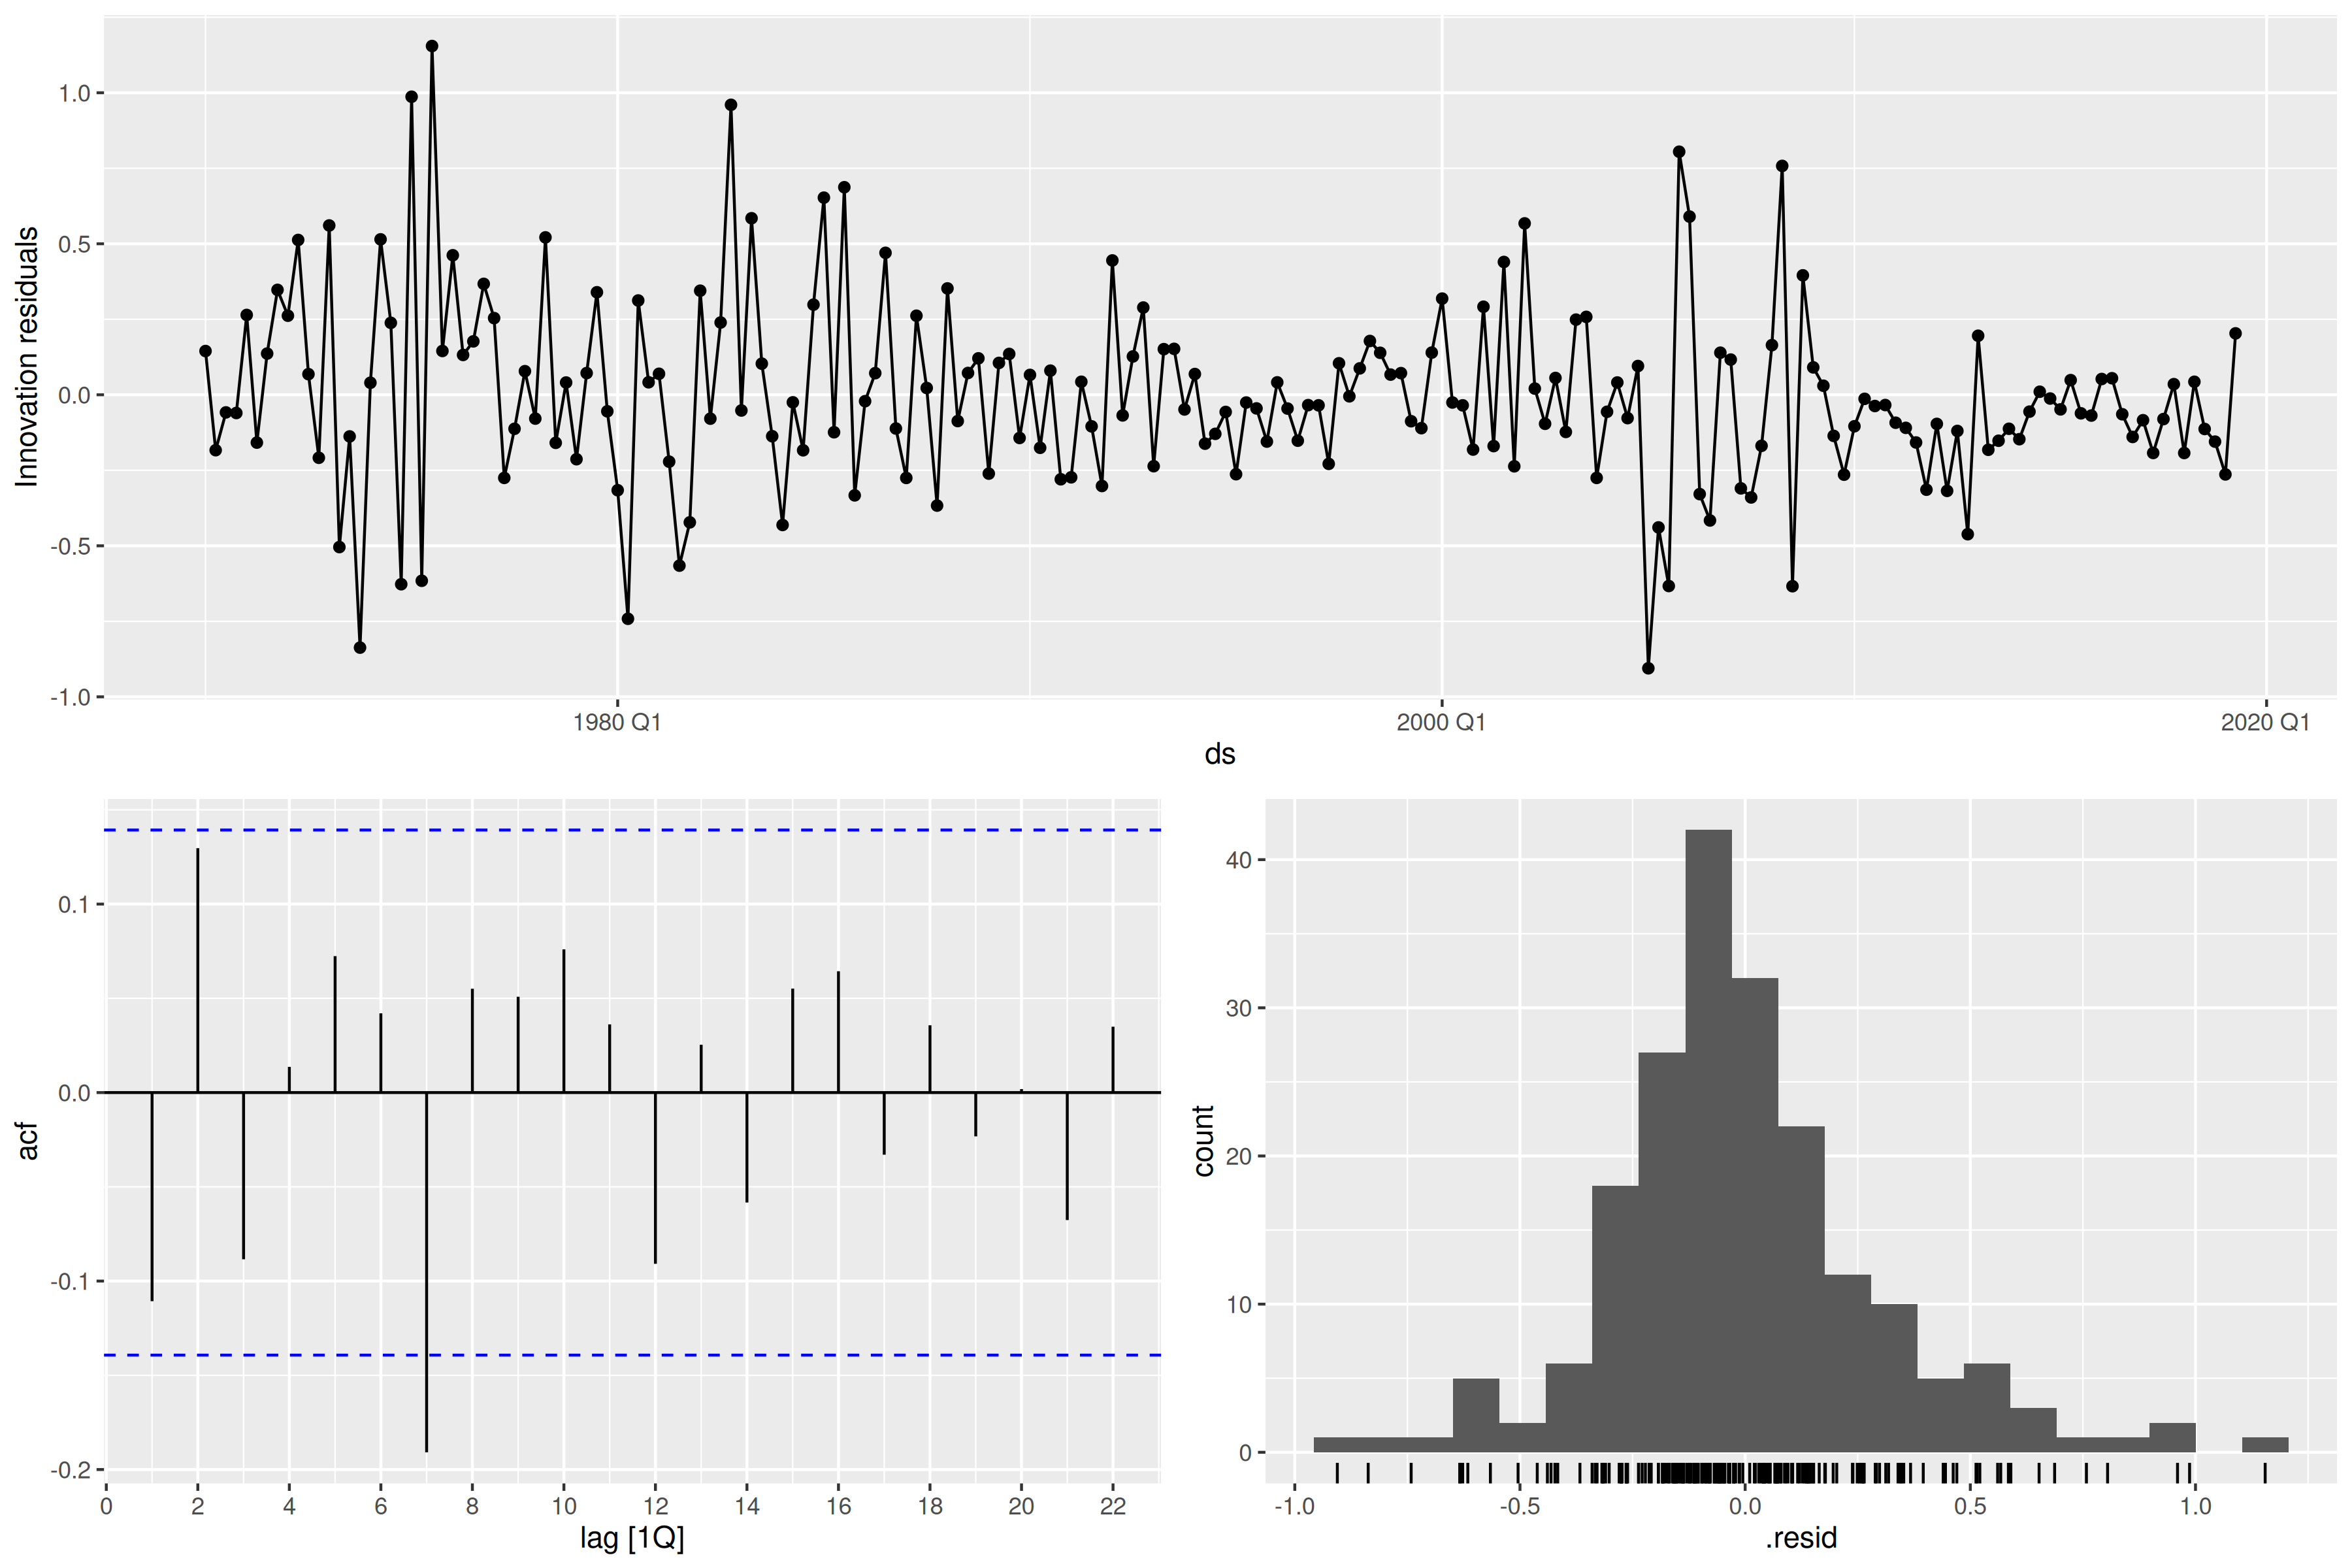

In [6]:
fit %>% gg_tsresiduals()